# Анализ показателей мобильного приложения

#### Описание проекта
Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. 

Задача — разобраться в причинах и помочь компании выйти в плюс.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Загрузка данных и их подготовка к анализу

In [1]:
#импортирую библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import ≠.pyplot as plt

In [2]:
#загружаю таблицы
users = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#вывожу информацию о датафреймах до корректировок
print('Данные о посещениях до корректировок:')
display(users.head())
display(users.info())
print('Данные о заказах до корректировок:')
display(orders.head())
display(orders.info())
print('Данные о затратах на маркетинг до корректировок:')
display(costs.head())
display(costs.info())


#корректирую названия столбцов - убираю пробелы и заглавные буквы
users.columns = users.columns.str.lower().str.replace(' ','_')
orders.columns = orders.columns.str.lower().str.replace(' ','_')
costs.columns = costs.columns.str.lower().str.replace(' ','_')

#меняю тип данных
users['session_start'] = pd.to_datetime(users['session_start'])
users['session_end'] = pd.to_datetime(users['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#вывожу информацию о датафреймах после корректировок
print('Данные о посещениях после корректировок:')
display(users.info())
print('Данные о заказах после корректировок:')
display(orders.info())
print('Данные о затратах на маркетинг после корректировок:')
display(costs.info())

Данные о посещениях до корректировок:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Данные о заказах до корректировок:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Данные о затратах на маркетинг до корректировок:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Данные о посещениях после корректировок:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

Данные о заказах после корректировок:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

Данные о затратах на маркетинг после корректировок:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

# Добавление функции для расчета и анализа LTV, ROI, удержания и конверсии

## Функция для создания пользовательских профилей

In [3]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


## Функция для расчёта LTV и ROI

In [4]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция для визуализации LTV и ROI

In [5]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Функция для сглаживания шума на графиках

In [6]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Функция для расчёта удержания

In [7]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта конверсии

In [8]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для визуализации удержания

In [9]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Функция для визуализации конверсии

In [10]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

In [11]:
#Строю профили пользователей
profiles = get_profiles(users, orders, costs)

#Выясняю миниммлальную и максимальные даты привелчения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


## Анализ по регионам

,total_users,payers,conv
region,,,
United States,100002,6902,0.07
UK,17575,700,0.04
France,17450,663,0.04
Germany,14981,616,0.04


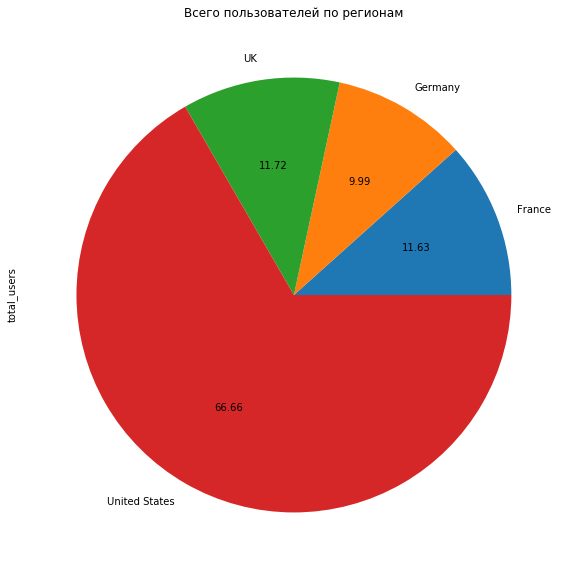

In [12]:
def profiles_analys(values, title):
    pivot_region = profiles.pivot_table(index=[values], columns=['payer'], values=['user_id'], aggfunc='count')
    pivot_region.columns = ['total_users','payers']
    pivot_region['total_users'] = pivot_region['total_users'] + pivot_region['payers']
    pivot_region['conv'] = round(pivot_region['payers']/pivot_region['total_users'], 2)
    display(pivot_region.sort_values('payers', ascending=False))    
    pivot_region.plot(kind='pie', y='total_users', figsize=(10,10), title=title, legend=False, autopct='%.2f')
    print()

profiles_analys('region', 'Всего пользователей по регионам')

___Вывод___: 
- Самый эффективный регион это "United States", как по общему числу привлеченных пользователей, так и по конверсии в платящих пользователей. 

- "UK" и "France" имеют примерно равную эффективность по количеству пользователей и коверсии в платящих пользователей, при этом уступают по всем показателям пользователям из "United States"

- Пользователей из региона "Germany" меньше всего, при это конверсия находится на уровне "UK" и "France".

## Анализ по устройствам

,total_users,payers,conv
device,,,
iPhone,54479,3382,0.06
Android,35032,2050,0.06
Mac,30042,1912,0.06
PC,30455,1537,0.05


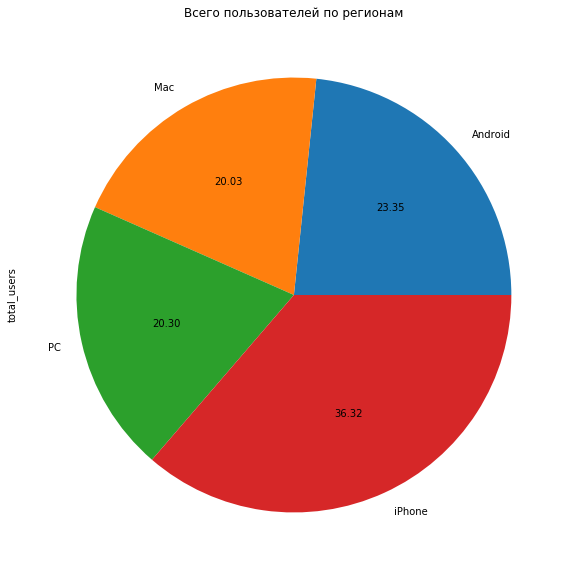

In [13]:
profiles_analys('device', 'Всего пользователей по регионам')

___Вывод___: 
- Больше всего платящих пользователей использующих "iPhone", меньше всего с "PC". 

- Конверсия на всех устройстах одинаковая, за исключением пользователей с "PC", где конверсия немного ниже остальных устройств.

## Анализ по каналам

,total_users,payers,conv
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


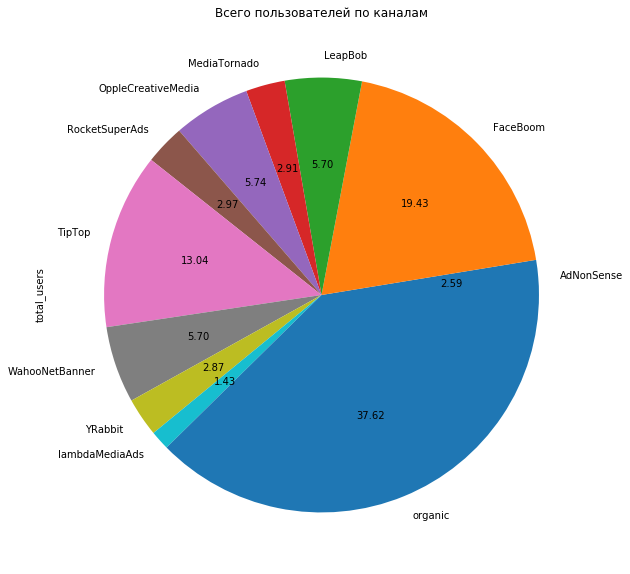

In [14]:
profiles_analys('channel', 'Всего пользователей по каналам')

___Вывод___: 
- Если не брать органику, то самый эффектинвый канал как по количеству пользователей пользователей так и по конверсии в платящих пользователей это "FaceBoom". 

- Также  выделяется канал "TipTop", по количеству пользователей он на втором месте а по конверсии на третьем.

- Остальные каналы привлекают значительно меньше пользователей

# Маркетинг

In [15]:
#отфильтровываю органический трафик
fitred_profiles = profiles.query('channel != "organic"')

In [16]:
print('Всего на рекламные каналы потрачено:', fitred_profiles['acquisition_cost'].sum().astype('int'))
print('')
print('Всего потрачено на рекламные каналы:')
display(fitred_profiles.pivot_table(index='channel', values='acquisition_cost',
                     aggfunc='sum').sort_values('acquisition_cost', ascending=False))

Всего на рекламные каналы потрачено: 105497

Всего потрачено на рекламные каналы:


,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


___Вывод___: Половина рекламного бюджета ушла на "TipTop", треть на "FaceBoom". Остальные каналы потратили значительно меньше

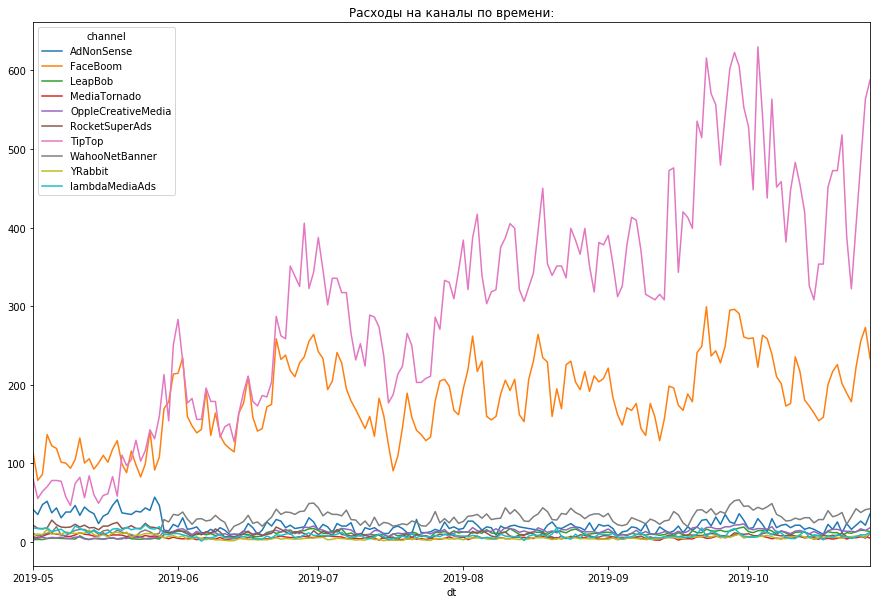

In [17]:
fitred_profiles.pivot_table(index='dt',columns='channel', values='acquisition_cost',
                     aggfunc='sum').plot(figsize=(15,10), title='Расходы на каналы по времени:')
print()

___Вывод___: В первые два исследуюемых месяца расходы на два самых дорогих канала "TipTop" и "FaceBoom" были примерно равны, но затем расходы на "TipTop" начали расти, а на "FaceBoom" они оставались примерно на одном и том же уровне

In [18]:
print('Средний САС равен:', round(fitred_profiles['acquisition_cost'].mean(), 2))
print()
print('CAC с разбивкой на каналы:')
display(round(fitred_profiles.pivot_table(index='channel', values='acquisition_cost',
                     aggfunc='mean').sort_values('acquisition_cost', ascending=False),2))

Средний САС равен: 1.13

CAC с разбивкой на каналы:


,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


___Вывод___: Самые дорогие пользователи приходят с канала "TipTop", стоимость привлечения пользователя по этому каналу более чем в два раза выше чем у следующего за ним канала

# Окупаемость рекламы

### Общая эффективность рекламы

#### Общая окупаемость

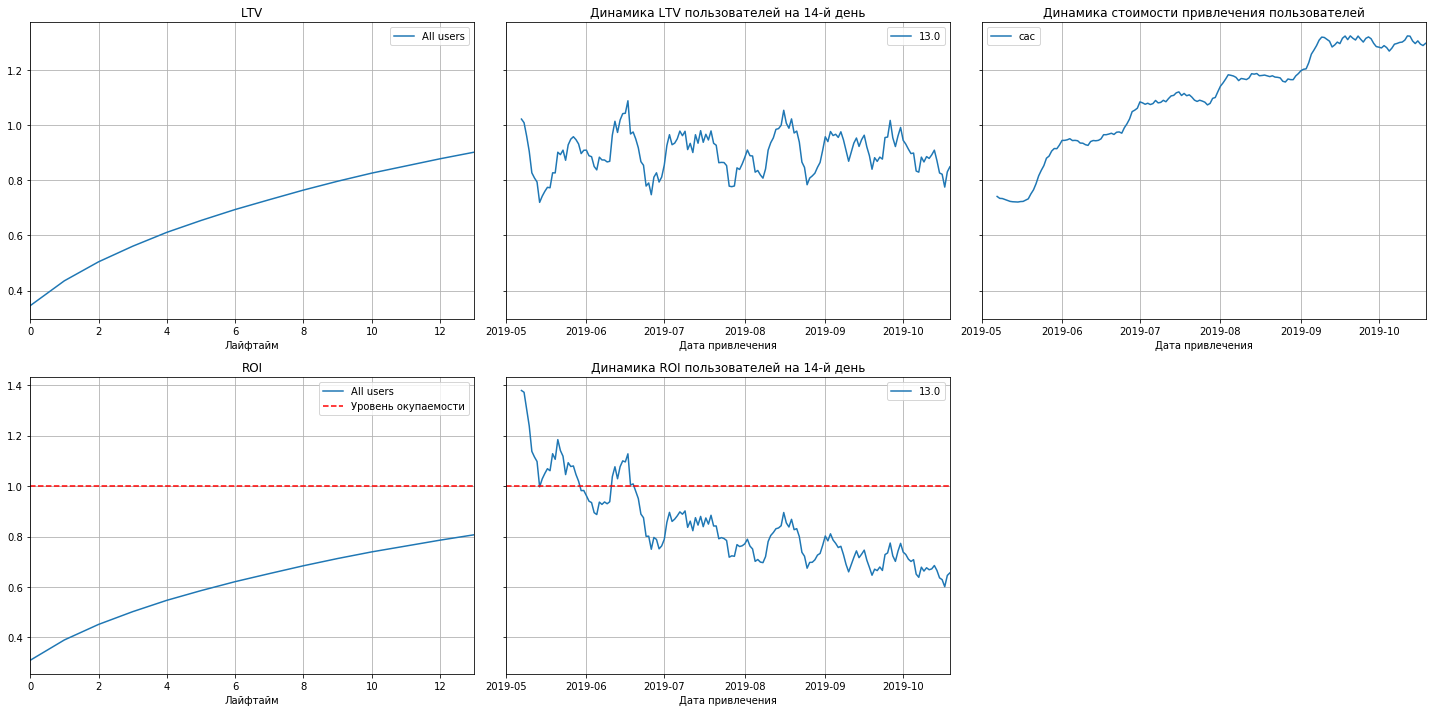

In [19]:
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    fitred_profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

___Вывод___:

-  CAC резко увеличился 2019-06, что совпадает с увеличением расхода на FaceBoom и TipTop
-  Резкое падение ROI со 180% 2019-05 до 100% 2019-06 также совпадает с датой увеличения рекламных расходов на FaceBoom и TipTop.  
-  В целом за рассматриваемый период реклама не окупается, ROI ниже 100%. При этом в начале периода, 2019-05 ROI был около 180%, после чего резко упал до 100% 2019-06 c последующим стабильным снижением до 80% к концу рассматриваемого периода 2019-10.

#### Общая конверсия

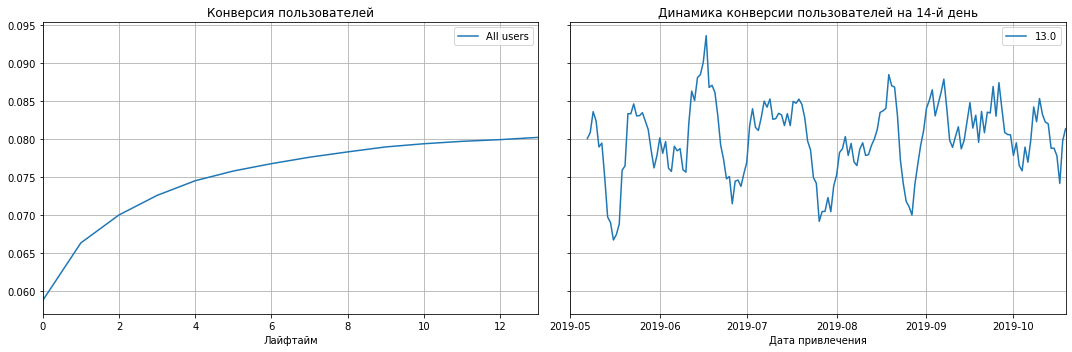

In [20]:
result_raw, result_grouped, result_in_time = get_conversion(
    fitred_profiles,
    orders,
    observation_date,
    horizon_days
)
plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

#### Общий Retention

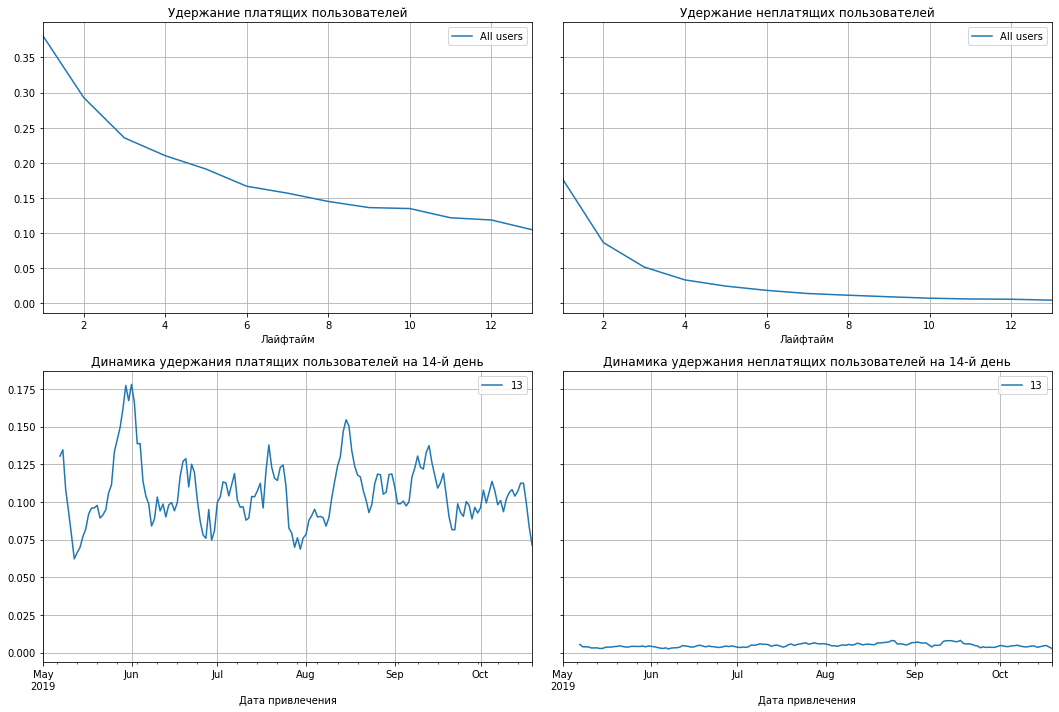

In [21]:
result_raw, result_grouped, result_in_time = get_retention(
    fitred_profiles,
    users,
    observation_date,
    horizon_days)

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

### Эффективность рекламы с разбивкой по устройствам

#### Окупаемость рекламы с разбивкой по устройствам

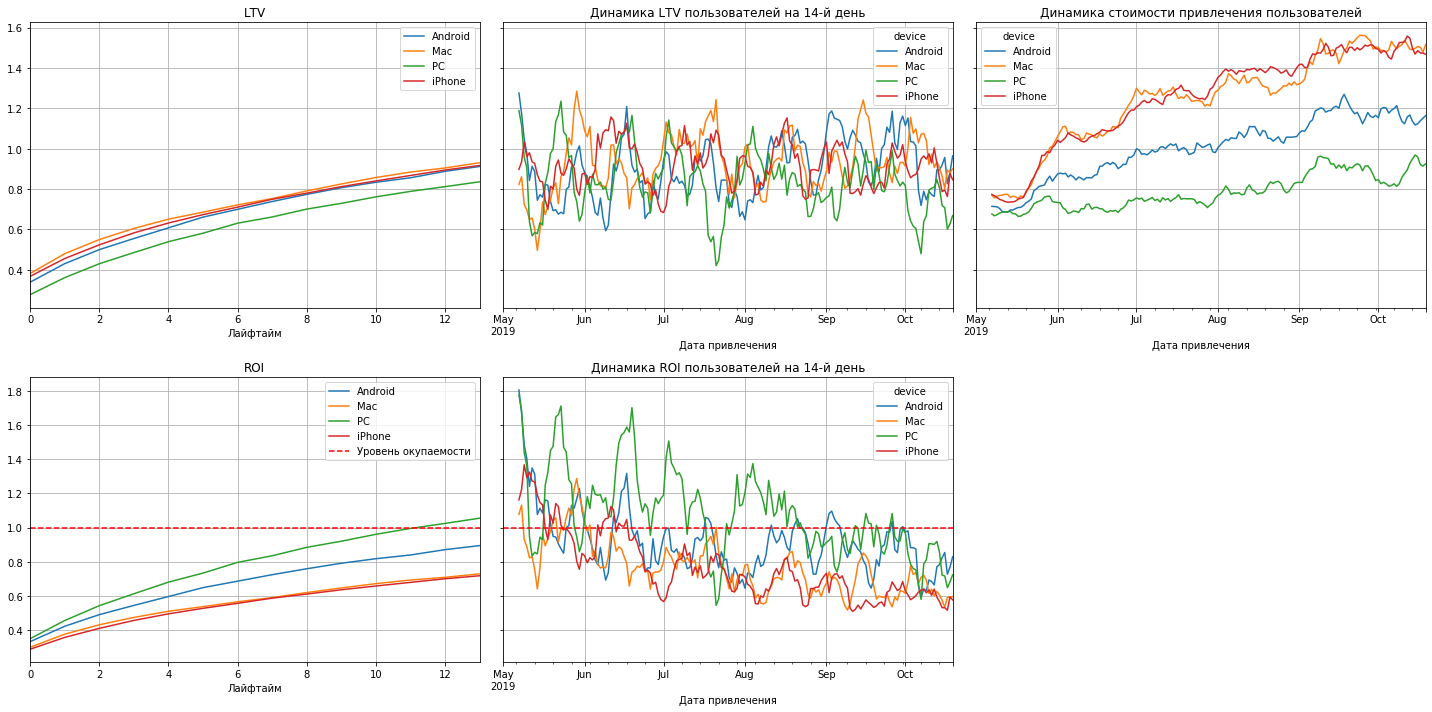

In [22]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    fitred_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

___Вывод___:

1. LTV пользователей на PC немного ниже пользователй с других устройств
2. Дешевле всего обходятся пользователи с PC. Самые дорогие пользователи с Mac и iPhone
3. К 14 лайфтайму окупаются только пользователи с  PC и Android
4. ROI стабильно снижался за весь рассматривемый период

Рекомендации:
Перераспределить бюджет с iPhone и Mac на PC

#### Конверсия рекламы с разбивкой по устройствам

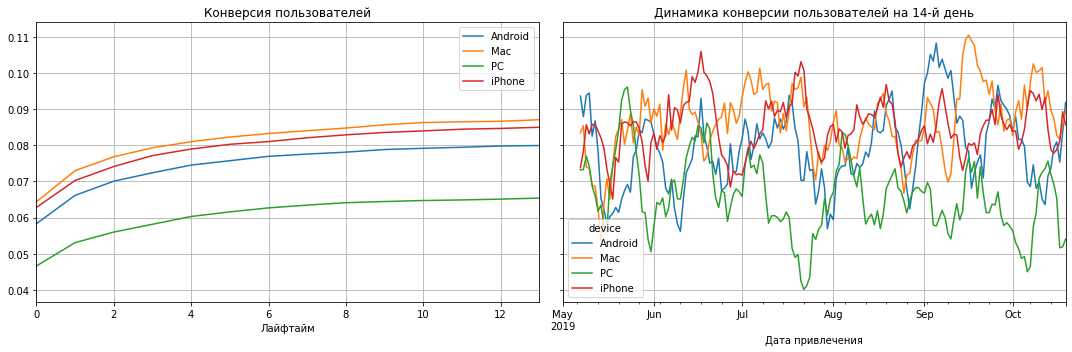

In [23]:
result_raw, result_grouped, result_in_time = get_conversion(
    fitred_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)
plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

#### Retention рекламы с разбивкой по устройствам

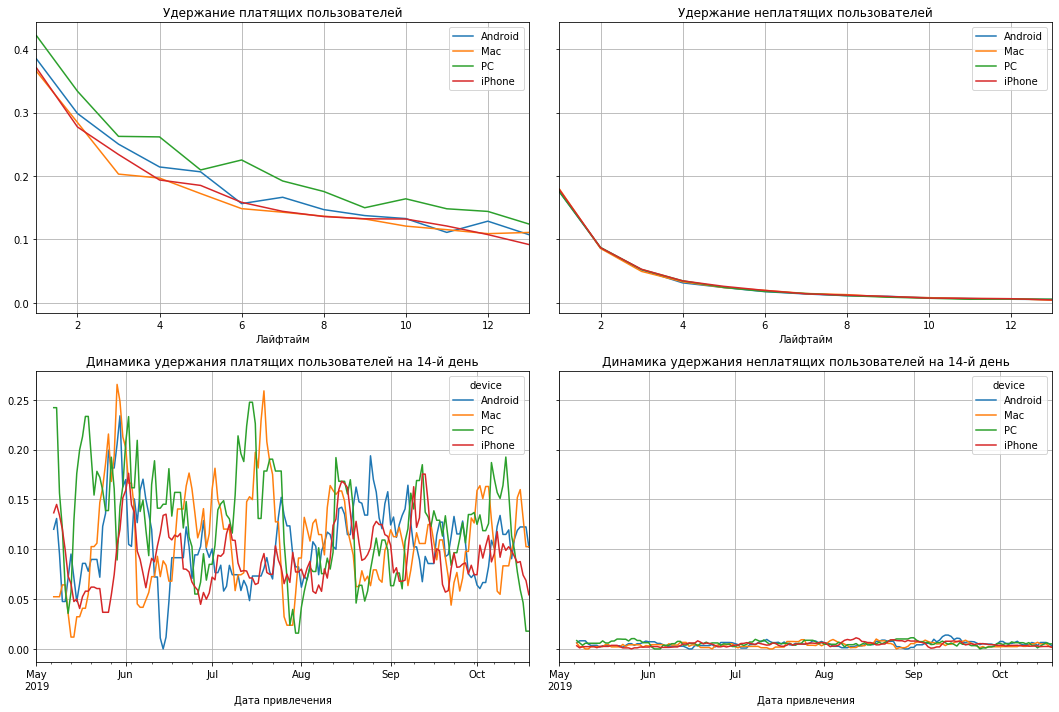

In [24]:
result_raw, result_grouped, result_in_time = get_retention(
    fitred_profiles,
    users,
    observation_date,
    horizon_days,
    dimensions=['device'])

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

### Эффективность рекламы с разбивкой по регионам

#### Окупаемость рекламы с разбивкой по регионам

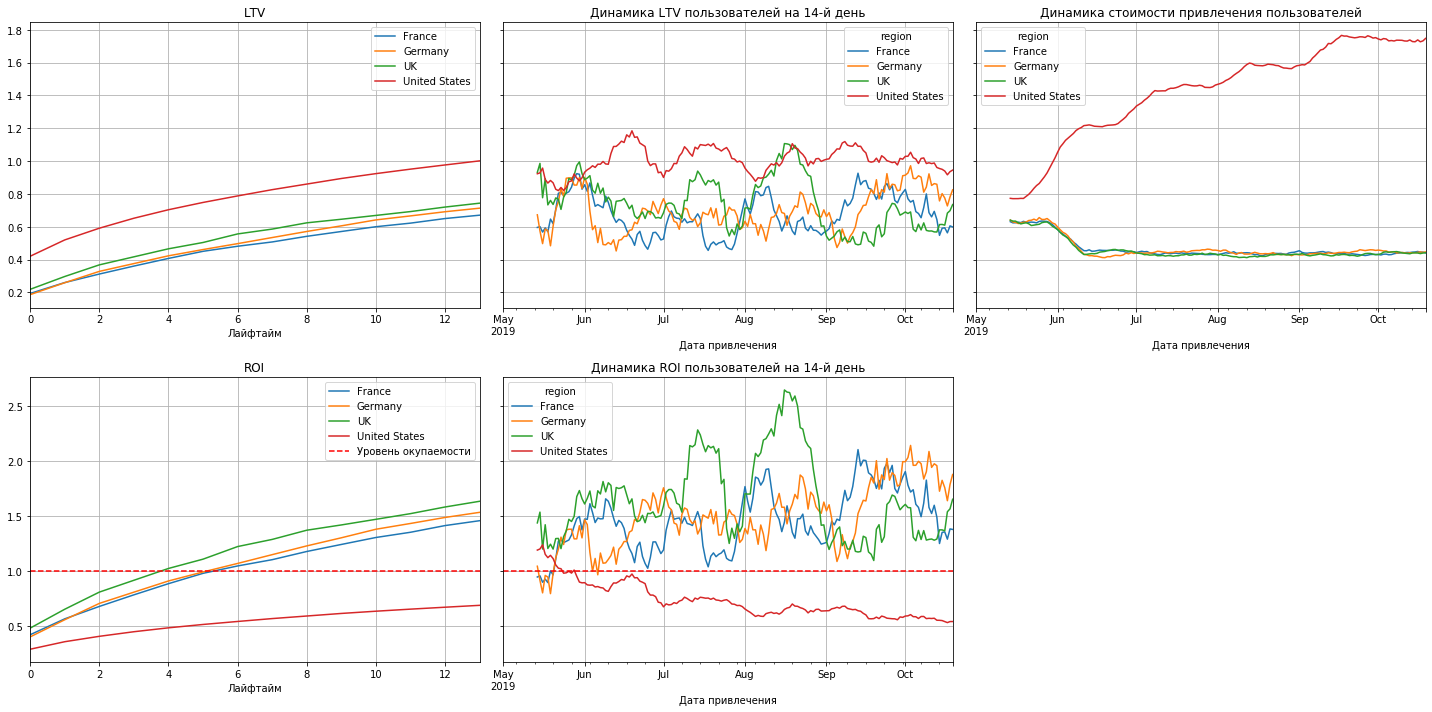

In [25]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    fitred_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

___Вывод___: 
1. Привлечение пользователей из United States в разы выше стоимости привлечения пользователей из других регионов
2. На 14 день ROI выше 100% по всем регионам кроме United States
3. ROI по региону United States резко снизился 2019-06(Jun)

Рекомендации: Перераспределить бюджет с United States на остальные регионы

#### Конверсия рекламы с разбивкой по регионам

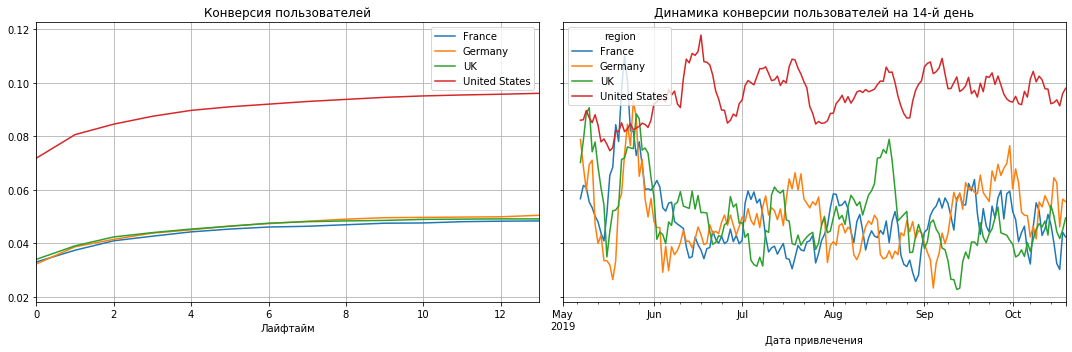

In [26]:
result_raw, result_grouped, result_in_time = get_conversion(
    fitred_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)
plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

#### Retention рекламы с разбивкой по регионам

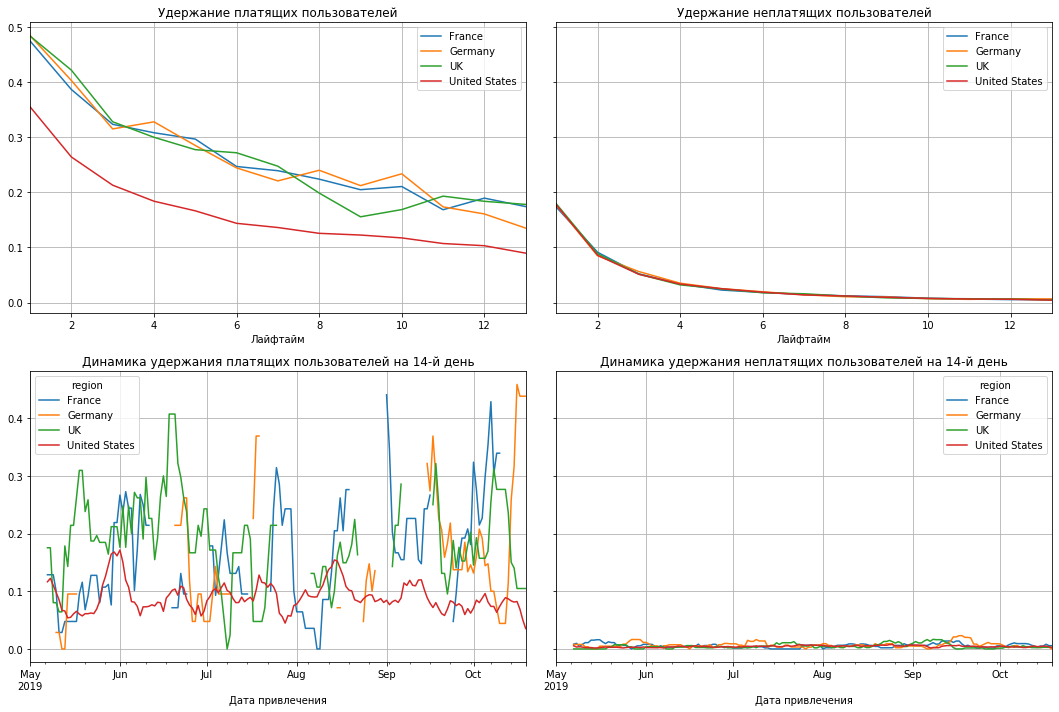

In [27]:
result_raw, result_grouped, result_in_time = get_retention(
    fitred_profiles,
    users,
    observation_date,
    horizon_days,
    dimensions=['region'])

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

### Эффективность рекламы с разбивкой по рекламным каналам

#### Окупаемость рекламы с разбивкой по рекламным каналам

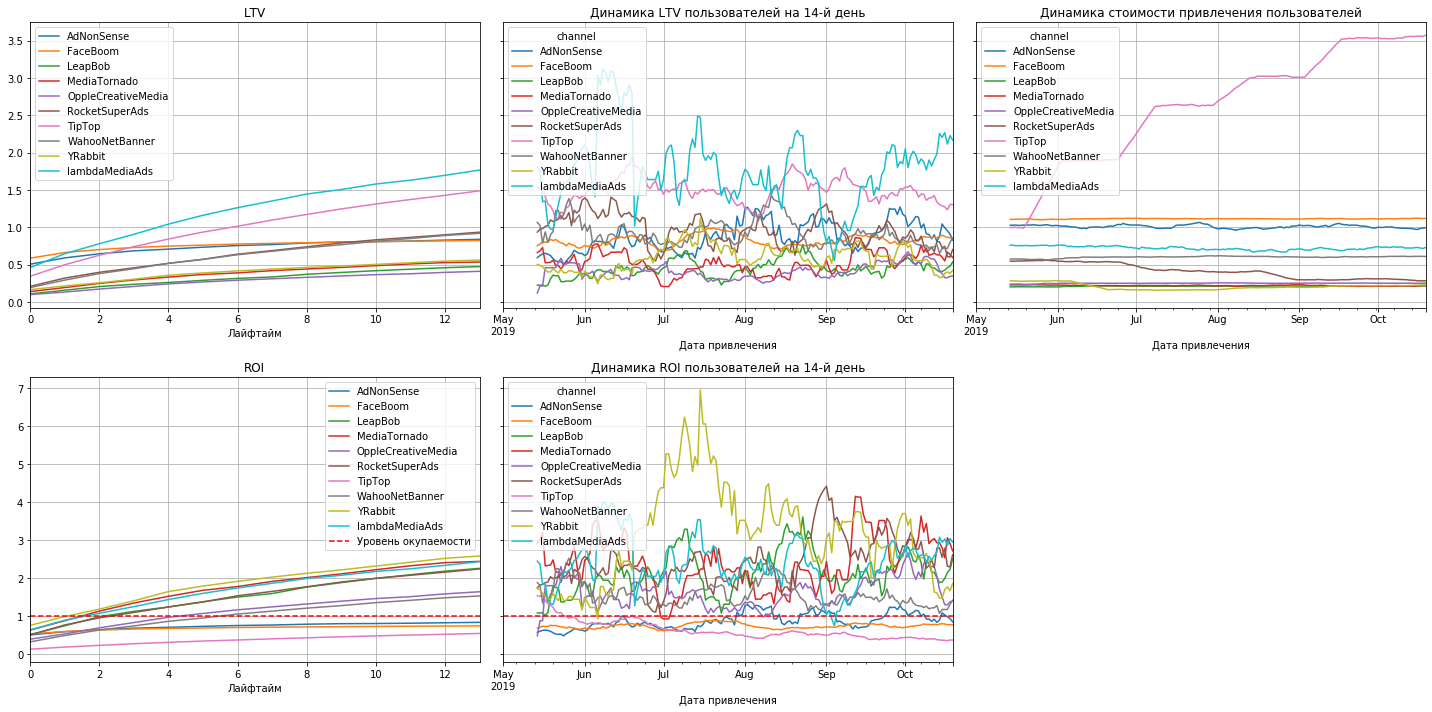

In [28]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    fitred_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

___Вывод___:
1. CAC  по каналу TipTop значительно вырос за рассматриваемый период
2. CAC стабилен по всем каналам кроме TipTop
3. LTV по каналу TipTop один из самых высоких, но при этом он значительно ниже CAC

Рекомендации: Перераспределить бюджет с TipTop на остальные каналы. 

Стоит обратить внимание на канал lambdaMediaAds - у канала стабильно самый высокий LTV

По каналу YRabbit в период с июль-август ROI достигал 700%, после чего произошло его резкое падение до средних по всем каналам значений. Возможно, стоит отдельно проанализировать период июль-август для YRabbit и выявить были ли в этот период какие либо изменения в рекламной стратегии, для их дальнейшего масштабирования.

#### Конверсия рекламы с разбивкой по каналам

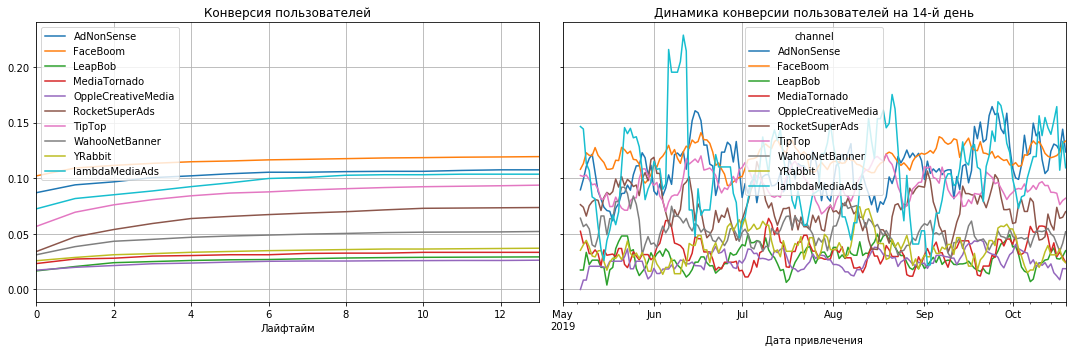

In [29]:
result_raw, result_grouped, result_in_time = get_conversion(
    fitred_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)
plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

#### Retention рекламы с разбивкой по каналам

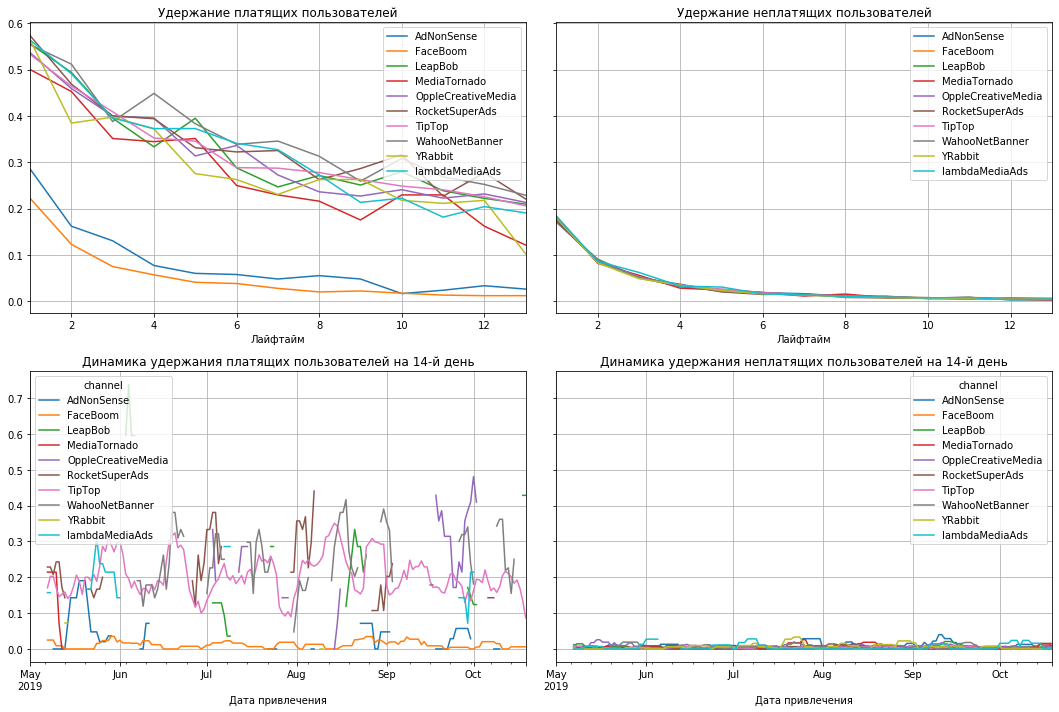

In [30]:
result_raw, result_grouped, result_in_time = get_retention(
    fitred_profiles,
    users,
    observation_date,
    horizon_days,
    dimensions=['channel'])

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

# Выводы

___Общие выводы___:
1. Вероятно, резкое снижение окупаемости в период с 2019-06 связано с резким увеличением расходов на неокупающийся канал TipTop. Необходимо начать перераспределение рекламного бюджета на другие каналы
2. Регион United States имеет самый высокий CAC. Необходимо перераспределить бюджет на остальные регионы
3. LTV по всем устройствам примерно на одном уровне, при этом CAC пользователей с iPhone и Mac значительно выше других устройств, в особенности PC. Необходимо перераспределение бюджета с iPhone и Mac на PC.
4. У канала lambdaMediaAds стабильно самый высокий LTV, вероятно, стоит протестировать увеличение бюджета на этот канал
5. По каналу YRabbit был резкий рост ROI до 700% в период июль-август, с последующим падением до средних значений. Вероятно, стоит, проанализировать рекламные кампании в этот период и повторно запустить аналогичную стратегию.